# Portugal Bank Marketing Predication 

##### import all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the data_sets

In [2]:
data= pd.read_csv("bank.csv",delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Lets check the  shape of the data 

In [3]:
data.shape

(41188, 21)

### lets create the copy of datasets 

In [4]:
df=data.copy()
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Handling Duplicates

In [5]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [6]:
# keep first duplicate row
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [8]:
df.shape

(41176, 21)

# Descriptive Statistics 

In [9]:
df.describe().style.background_gradient(cmap="copper")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.023800,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.420680,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking the missing Value 

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

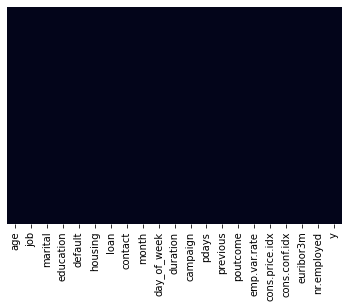

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
# finding the unique value 
for i in df.columns:
    print({i:df[i].unique()})

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)}
{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['no', 'yes', 'unknown'], dtype=object)}
{'loan': array(['no', 'yes', 'unknown'], dtype=object)}
{'c

# EXploraty data Analysis

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

<AxesSubplot:>

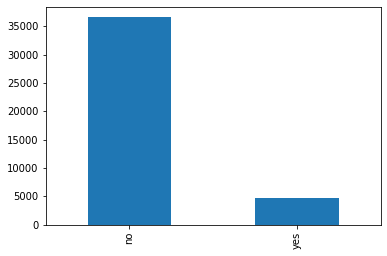

In [15]:
df["y"].value_counts().plot(kind="bar")

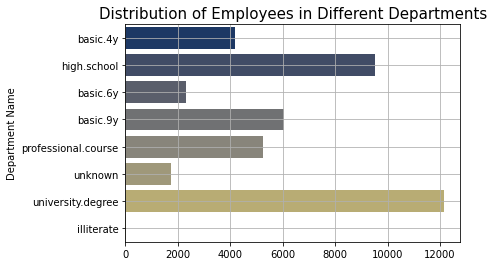

In [16]:

# lets check different education 
sns.countplot(y = df['education'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

In [17]:
# converting date and month  to the numerical 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
df["month"].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [19]:
df['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [20]:
month={ 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

df["month"]=df.month.map(month)

In [21]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9], dtype=int64)

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
week={"mon":1,"tue":2,"wed":3,"thu":4,"fri":5}
df['day_of_week']=df.day_of_week.map(week)

In [24]:
df["day_of_week"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
value={"no":0,"yes":1}
df["y"]=df.y.map(value)

In [26]:
df["y"].unique()

array([0, 1], dtype=int64)

In [27]:
# looking to categorical data

cat=[feature for feature in df.columns if df[feature].dtypes=="O"]
print(cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [28]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.poutcome.value_counts())


admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

 married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

 university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

 no         32577
unknown     8596
yes            3
Name: default, dtype: int64

 yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

 no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

 cellular     26135
telephone    15041
Name: contact, dtype: int64

 nonexistent    35551
fai

In [29]:
lab={"single":0,"married":1,"divorced":3,"unknown":4,}
df['marital']=df.marital.map(lab)

df["marital"].unique()

array([1, 0, 3, 4], dtype=int64)

In [30]:
categorical=[feature for feature in df.columns if df[feature].dtypes=="O"]
print(categorical)

['job', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [31]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in categorical:
    df[x]=le.fit_transform(df[x])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

# Assumption 1 : there should be no outliers in the data

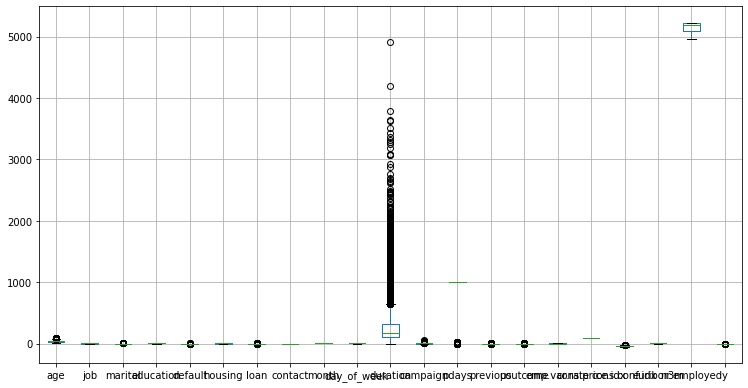

In [33]:

plt.rcParams["figure.figsize"] = [10.5, 5.5]
plt.rcParams["figure.autolayout"] = True
df.boxplot()
plt.show()

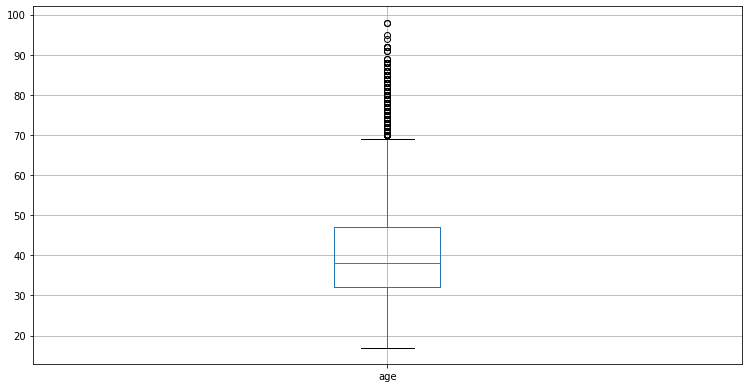

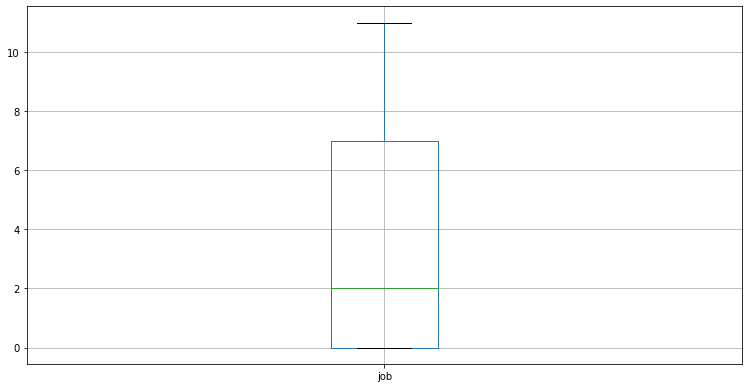

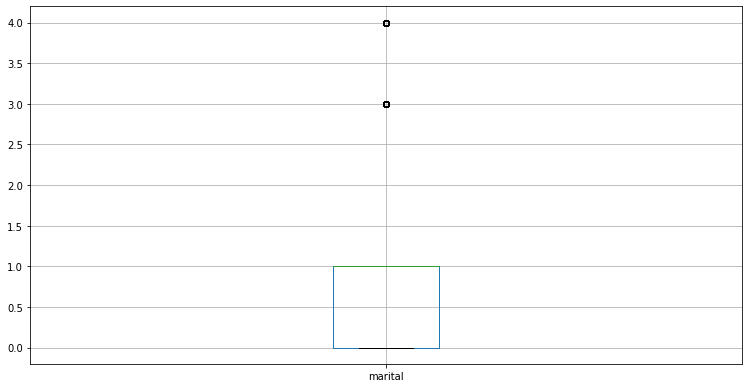

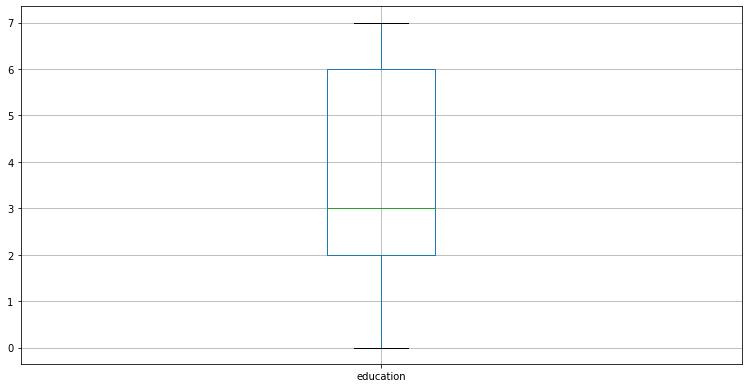

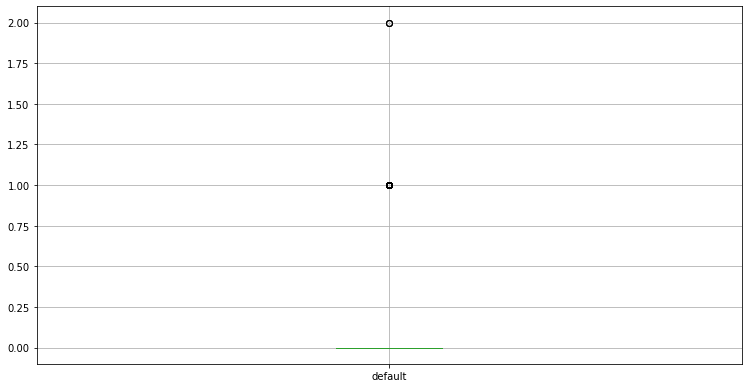

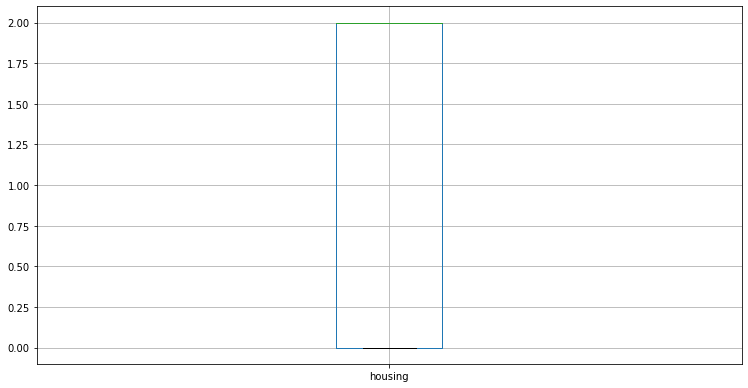

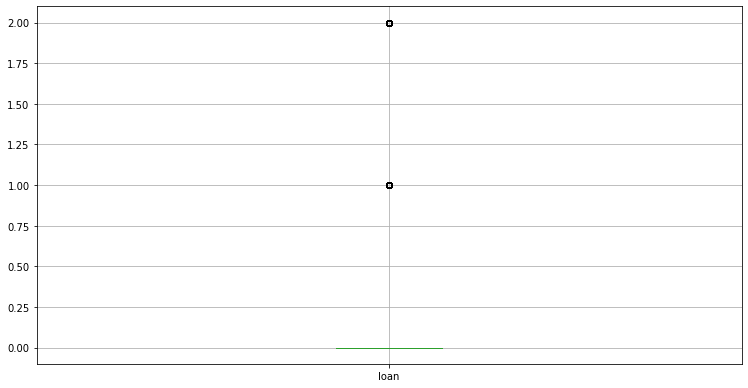

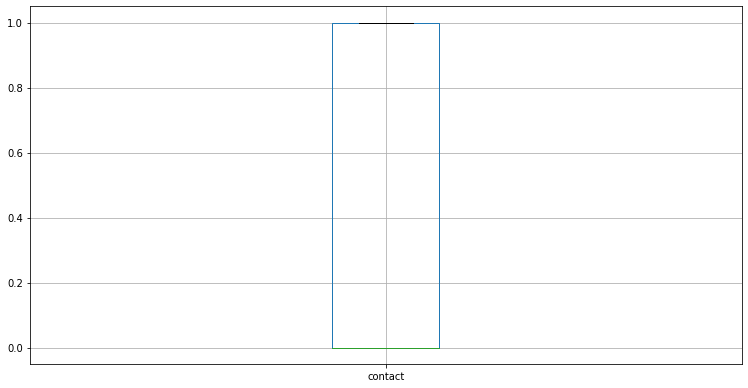

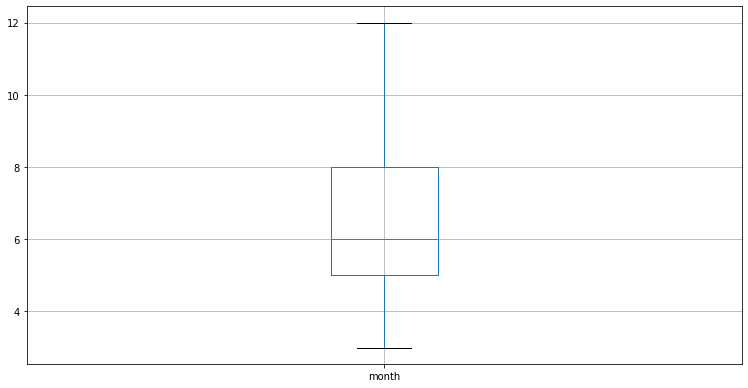

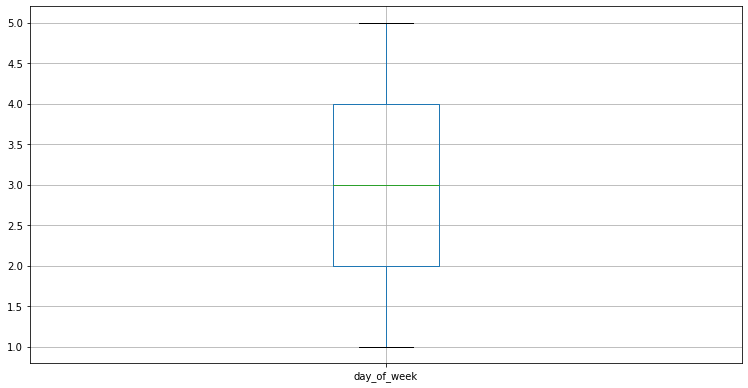

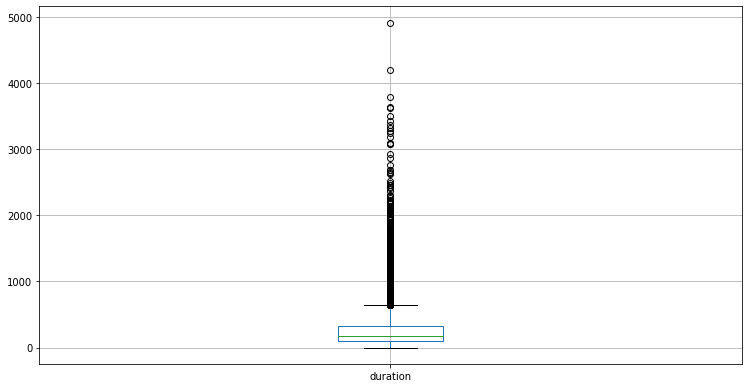

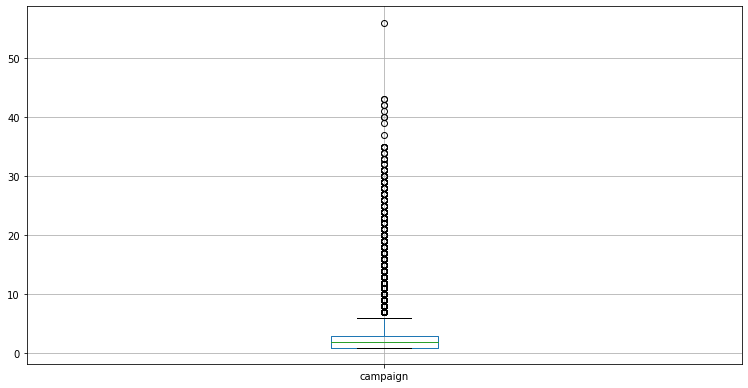

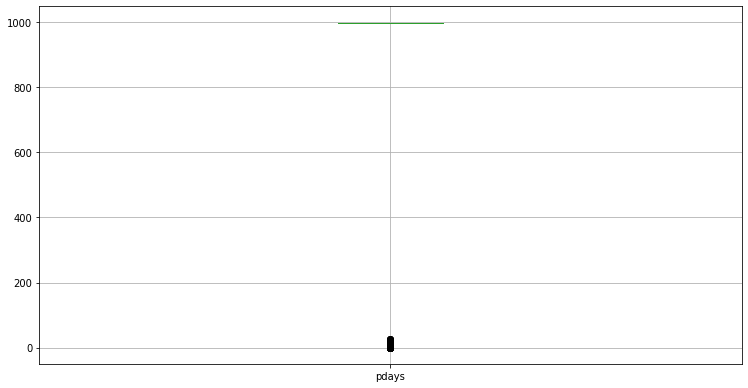

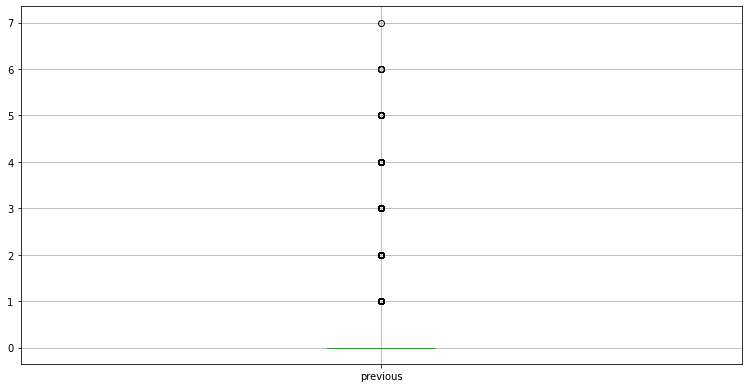

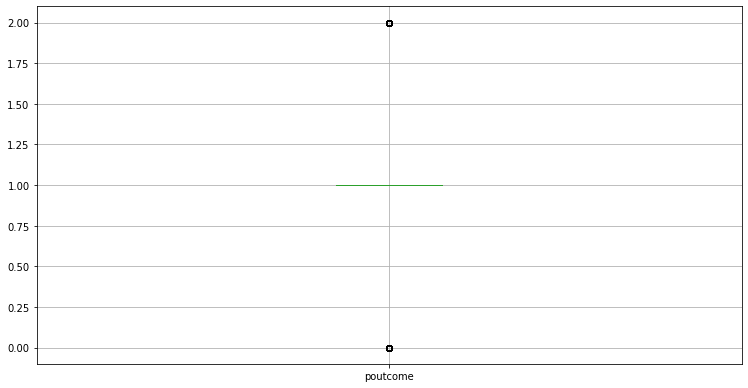

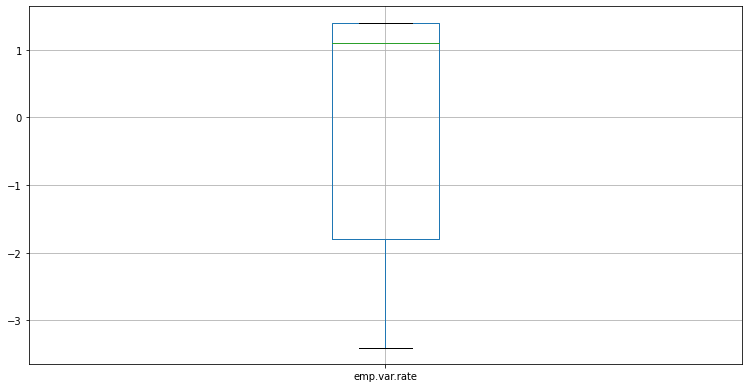

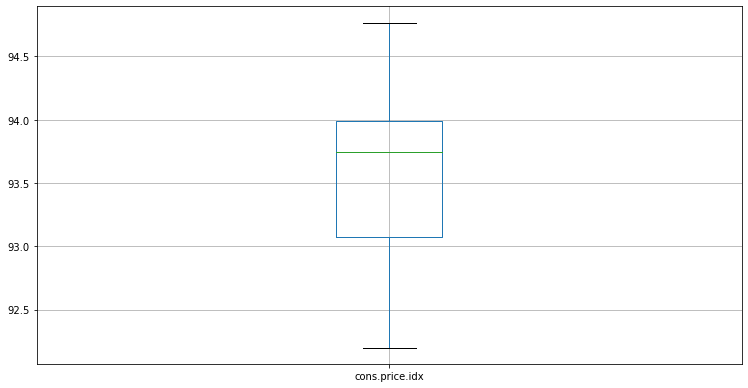

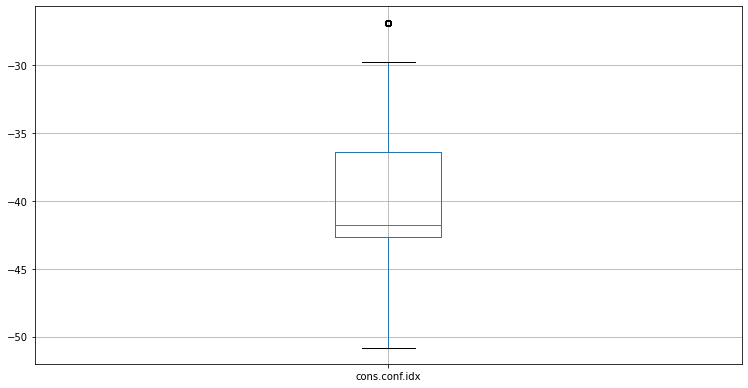

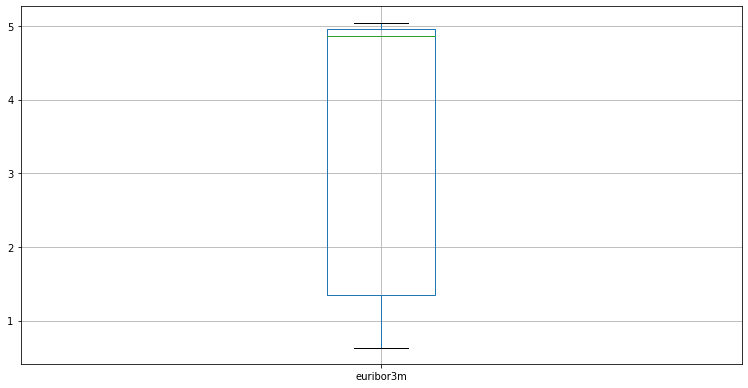

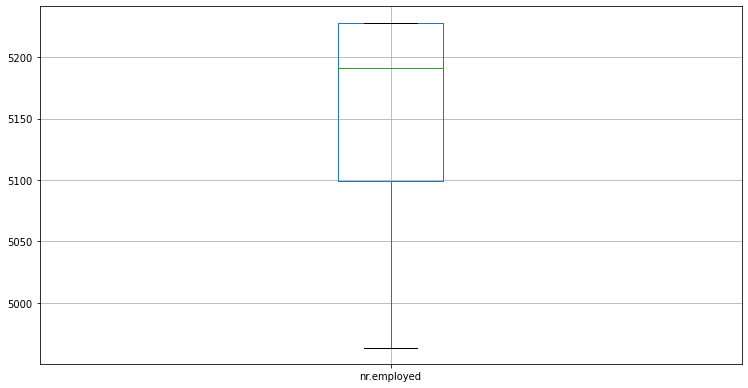

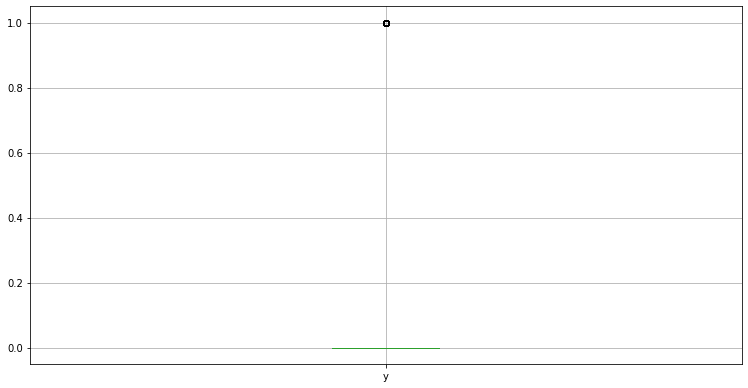

In [34]:
for outlier in df.columns:
    df.boxplot(column=outlier)
    plt.show()

# Create X and Y  for both Train and Test

In [35]:
X=df.drop(['y'],axis=1)
X.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [36]:
Y=df['y']
Y.head(3)

0    0
1    0
2    0
Name: y, dtype: int64

In [37]:
print(X.shape)
print(Y.shape)

(41176, 20)
(41176,)


# Assumption 4 : No multicollinearity 

In [38]:

corr_df=X.corr(method="pearson")
print(corr_df)

                     age       job   marital  education   default   housing  \
age             1.000000  0.001270  0.336278  -0.117960  0.164939 -0.001477   
job             0.001270  1.000000 -0.012440   0.134159 -0.028282  0.006873   
marital         0.336278 -0.012440  1.000000  -0.071154  0.044949 -0.010235   
education      -0.117960  0.134159 -0.071154   1.000000 -0.186811  0.016891   
default         0.164939 -0.028282  0.044949  -0.186811  1.000000 -0.015790   
housing        -0.001477  0.006873 -0.010235   0.016891 -0.015790  1.000000   
loan           -0.007359 -0.010161 -0.005859   0.006441 -0.003823  0.044272   
contact         0.006917 -0.025054  0.039001  -0.105722  0.135275 -0.082098   
month           0.077098  0.044850  0.015295   0.124349 -0.084340  0.032010   
day_of_week    -0.018443 -0.004843 -0.014802   0.005946 -0.004210 -0.009093   
duration       -0.000808 -0.006408 -0.007137  -0.015086 -0.011805 -0.007688   
campaign        0.004622 -0.006865  0.009726   0.000

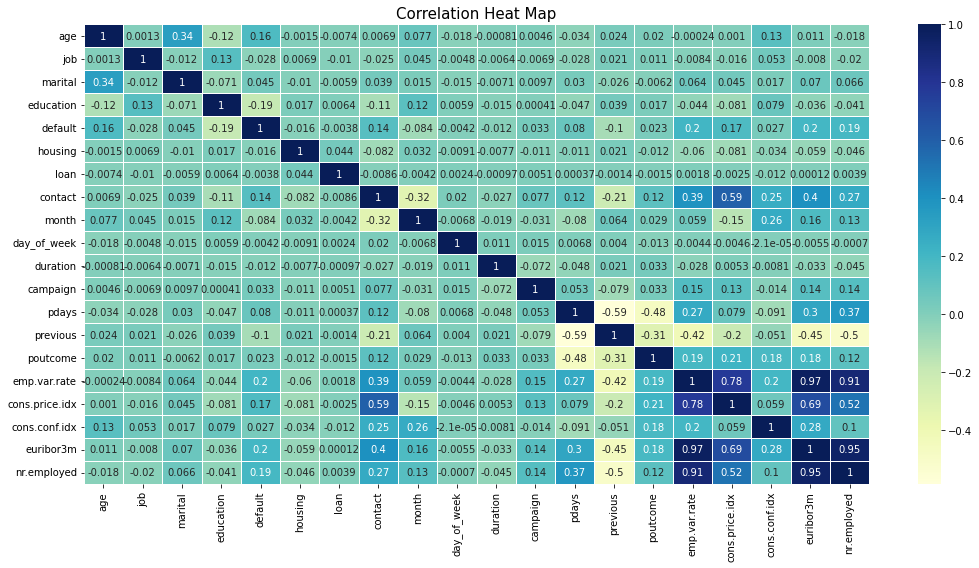

In [39]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(X.corr(), annot = True, linewidth = 0.5, cmap = 'YlGnBu')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [40]:
from sklearn.preprocessing  import StandardScaler

scaler=StandardScaler()
scaler.fit(X)

X= scaler.transform(X)

In [41]:
Y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [42]:
!pip install imbalanced-learn==0.6.0

In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state = 10, k_neighbors=5)
X_reshape,Y_reshape=sm.fit_resample(X,Y)


In [44]:
print('After OverSampling, the shape of X: ', (X.shape))
print('After OverSampling, the shape of y: ', (Y.shape))

After OverSampling, the shape of X:  (41176, 20)
After OverSampling, the shape of y:  (41176,)


In [45]:
print('After OverSampling, the shape of X: ', (X_reshape.shape))
print('After OverSampling, the shape of y: ', (Y_reshape.shape))

After OverSampling, the shape of X:  (73074, 20)
After OverSampling, the shape of y:  (73074,)


In [46]:
print("After OverSampling, counts of label '1': ", (sum(Y_reshape == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_reshape == 0)))

After OverSampling, counts of label '1':  36537
After OverSampling, counts of label '0':  36537


In [47]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape, Y_reshape, test_size = 0.2, 
                                                    random_state = 10)

In [48]:
print(f"X_train-shape:{X_train.shape}")
print(f"Y_train-shape :{Y_train.shape}")
print(f"X_test-shape:{X_test.shape}")
print(f"Y_test-shape:{Y_test.shape}")

X_train-shape:(58459, 20)
Y_train-shape :(58459,)
X_test-shape:(14615, 20)
Y_test-shape:(14615,)


# Selecting import features based on RandomForest 

In [49]:
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=10)



# fit the model to the training set

RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [50]:
for name, importance in zip(df.columns[0:-1], RF.feature_importances_):
    print(name, "=", importance)

age = 0.03953102945111547
job = 0.028349070798932553
marital = 0.017886322264705334
education = 0.031896572570353346
default = 0.007472071451328805
housing = 0.009590751223938432
loan = 0.00667437372165892
contact = 0.015892601429221904
month = 0.033176705804060694
day_of_week = 0.036795399554375434
duration = 0.37392792834105104
campaign = 0.04703392596406114
pdays = 0.01836842473782275
previous = 0.0068611924311993595
poutcome = 0.02000337180123748
emp.var.rate = 0.0507526049485586
cons.price.idx = 0.03663386348501404
cons.conf.idx = 0.04260056303994537
euribor3m = 0.0961647352387845
nr.employed = 0.0803884917426348


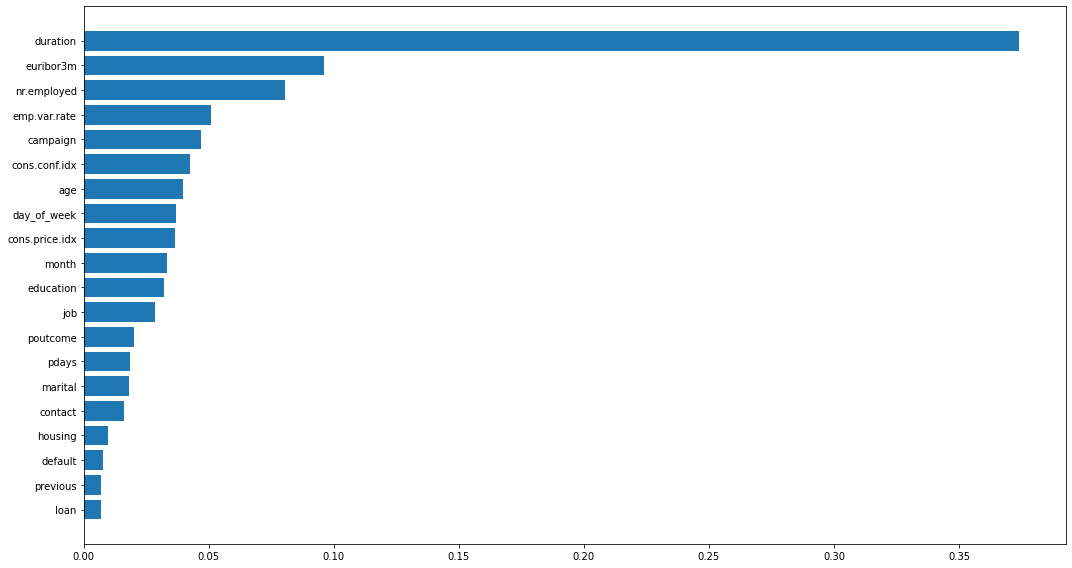

In [51]:
f_i = list(zip(df.columns[0:-1],RF.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [52]:
df.drop(["loan","default","housing","previous","marital","contact"],axis=1, inplace=True)

In [53]:
df.shape

(41176, 15)

In [54]:
df.dtypes

age                 int64
job                 int32
education           int32
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [55]:
df["y"].value_counts()

0    36537
1     4639
Name: y, dtype: int64

# Create A and B  again  feature selection

In [56]:
A=df.drop(['y'],axis=1)
A.head(3)

,age,job,education,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,5,1,261,1,999,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,3,5,1,149,1,999,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,3,5,1,226,1,999,1,1.1,93.994,-36.4,4.857,5191.0


In [57]:
B=df['y']
B.head(3)

0    0
1    0
2    0
Name: y, dtype: int64

In [58]:
print(A.shape)
print(B.shape)

(41176, 14)
(41176,)


In [59]:
from sklearn.preprocessing  import StandardScaler

scaler=StandardScaler()
scaler.fit(A)

A= scaler.transform(A)

In [60]:
B.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [61]:
!pip install imbalanced-learn==0.6.0

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state = 10, k_neighbors=5)
X_reshape,Y_reshape=sm.fit_resample(A,B)


In [63]:
print('After OverSampling, the shape of X: ', (A.shape))
print('After OverSampling, the shape of y: ', (B.shape))

After OverSampling, the shape of X:  (41176, 14)
After OverSampling, the shape of y:  (41176,)


In [64]:
print('After OverSampling, the shape of X: ', (X_reshape.shape))
print('After OverSampling, the shape of y: ', (Y_reshape.shape))

After OverSampling, the shape of X:  (73074, 14)
After OverSampling, the shape of y:  (73074,)


In [65]:
print("After OverSampling, counts of label '1': ", (sum(Y_reshape == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_reshape == 0)))

After OverSampling, counts of label '1':  36537
After OverSampling, counts of label '0':  36537


In [66]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_reshape, Y_reshape, test_size = 0.2, 
                                                    random_state = 10)

In [67]:
print(f"X_train-shape:{X_train.shape}")
print(f"Y_train-shape :{Y_train.shape}")
print(f"X_test-shape:{X_test.shape}")
print(f"Y_test-shape:{Y_test.shape}")

X_train-shape:(58459, 14)
Y_train-shape :(58459,)
X_test-shape:(14615, 14)
Y_test-shape:(14615,)


# Model Bulding 

# LogisticRegression 

In [68]:
from sklearn.linear_model import LogisticRegression
# create model
classifier= LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 0 0 ... 0 0 1]


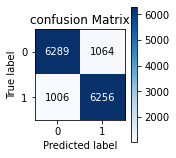

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7353
           1       0.85      0.86      0.86      7262

    accuracy                           0.86     14615
   macro avg       0.86      0.86      0.86     14615
weighted avg       0.86      0.86      0.86     14615

Accuracy of the model:  0.8583646938077318


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# Adjusting  the threshold

In [70]:
# store the predicted probabolities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.23292111 0.76707889]
 [0.9493635  0.0506365 ]
 [0.72959812 0.27040188]
 ...
 [0.9371783  0.0628217 ]
 [0.8880433  0.1119567 ]
 [0.02044821 0.97955179]]


In [71]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1999  , type 2 error : 629  , type 1 error: 1370
Errors at threshold  0.41000000000000003 : 1997  , type 2 error : 664  , type 1 error: 1333
Errors at threshold  0.42000000000000004 : 1998  , type 2 error : 697  , type 1 error: 1301
Errors at threshold  0.43000000000000005 : 1997  , type 2 error : 733  , type 1 error: 1264
Errors at threshold  0.44000000000000006 : 2009  , type 2 error : 772  , type 1 error: 1237
Errors at threshold  0.45000000000000007 : 2015  , type 2 error : 807  , type 1 error: 1208
Errors at threshold  0.4600000000000001 : 2027  , type 2 error : 855  , type 1 error: 1172
Errors at threshold  0.4700000000000001 : 2032  , type 2 error : 891  , type 1 error: 1141
Errors at threshold  0.4800000000000001 : 2043  , type 2 error : 929  , type 1 error: 1114
Errors at threshold  0.4900000000000001 : 2059  , type 2 error : 969  , type 1 error: 1090
Errors at threshold  0.5000000000000001 : 2070  , type 2 error : 1006  , type 1 error: 1064
Errors a

In [72]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.41:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 

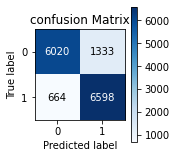

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7353
           1       0.83      0.91      0.87      7262

    accuracy                           0.86     14615
   macro avg       0.87      0.86      0.86     14615
weighted avg       0.87      0.86      0.86     14615

Accuracy of the model:  0.8633595620937393


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred_class)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

# ADaBoost_Classifier

In [74]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  LogisticRegression(),
                                  n_estimators=100,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

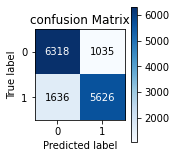

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      7353
           1       0.84      0.77      0.81      7262

    accuracy                           0.82     14615
   macro avg       0.82      0.82      0.82     14615
weighted avg       0.82      0.82      0.82     14615

Accuracy of the model:  0.8172425590147109


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# c. Naïve Bayes


In [76]:
from sklearn.naive_bayes import BernoulliNB

model=BernoulliNB(alpha=1.0,binarize=0.0)
#Alpha--> value for Laplacian correction method to avoid the zero frequency problem
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

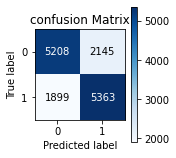

Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      7353
           1       0.71      0.74      0.73      7262

    accuracy                           0.72     14615
   macro avg       0.72      0.72      0.72     14615
weighted avg       0.72      0.72      0.72     14615

Accuracy of the model:  0.7232979815258296


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

# KNN model

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='manhattan')

# fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (0, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0),

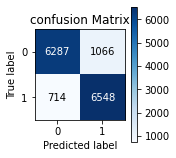

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7353
           1       0.86      0.90      0.88      7262

    accuracy                           0.88     14615
   macro avg       0.88      0.88      0.88     14615
weighted avg       0.88      0.88      0.88     14615

Accuracy of the model:  0.8782073212452959


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

### tunning

In [80]:
print(np.sqrt(len(X_train)))

241.7829605245167


In [81]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,31):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="manhattan")
    model_KNN.fit(X_train, Y_train)
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.9570304481696886 for K-Value: 1
Accuracy is  0.9520355798836811 for K-Value: 2
Accuracy is  0.9452617174136162 for K-Value: 3
Accuracy is  0.9456722545330141 for K-Value: 4
Accuracy is  0.9360930550803969 for K-Value: 5
Accuracy is  0.9366404379062607 for K-Value: 6
Accuracy is  0.9295244611700307 for K-Value: 7
Accuracy is  0.9303455354088266 for K-Value: 8
Accuracy is  0.9248717071501882 for K-Value: 9
Accuracy is  0.9260348956551488 for K-Value: 10
Accuracy is  0.9240506329113924 for K-Value: 11
Accuracy is  0.9224769072870339 for K-Value: 12
Accuracy is  0.9199452617174136 for K-Value: 13
Accuracy is  0.9188504960656859 for K-Value: 14
Accuracy is  0.9159083133766678 for K-Value: 15
Accuracy is  0.9160451590831338 for K-Value: 16
Accuracy is  0.9141293191926103 for K-Value: 17
Accuracy is  0.9139240506329114 for K-Value: 18
Accuracy is  0.9128292849811838 for K-Value: 19
Accuracy is  0.912076633595621 for K-Value: 20
Accuracy is  0.9113239822100582 for K-Value: 21
Ac

In [82]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

1 : 0.9570304481696886


In [83]:
# predicting using the KNeighbors_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
# euclidean, manhattan, minkowski
# fit the model on the data and predict the values
model_KNN.fit(X_train, Y_train)

Y_pred_knn = model_KNN.predict(X_test)
# print(list(zip(Y_test, Y_pred)))

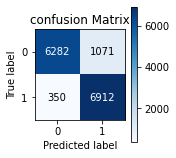

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7353
           1       0.87      0.95      0.91      7262

    accuracy                           0.90     14615
   macro avg       0.91      0.90      0.90     14615
weighted avg       0.91      0.90      0.90     14615

Accuracy of the model:  0.9027711255559356


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

## SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', C = 20, gamma = 0.01)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)
# print(list(Y_pred))

In [ ]:
svm_model.score(X_train, Y_train)

# score
# Y_pred = svc_model.predict(X_train)
# accuracy.score(Y_train, Y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
''' 
The performance of all the models are listed below - 

a. Logistic Regression 86.50%
b. AdaBoost 85.40%
c. Naïve Bayes 72.22%
d. KNN 90.59% on Manhattan
e. SVM 90.39%

From above we can conclude that KNN is best fit model for our data.

'''